# Lab Report 2

**Research question 1**: Can we observe a masked priming effect (in a non-native language)?

**Research question 2**: If there is a masked priming effect, does it increase, decrease, or stay the same after a short period of time (80 ms)?

**Research question 3**: If there is a masked priming effect, is there also a semantic priming effect (in the incongruent pairs)?

Other things to check:

- did participants improve over time (both within blocks and over all trials)?
- did it make a difference whether participants were in block A or block B (short SOA then long vs. long SOA then short)?
- ???

Two main communications: short and long Stimulus Onset Asynchrony (SOA)

- Fixation: ###### 539 ms
- Mask: ##### 32 ms
- Prime: 32 ms
- Mask: ##### 32 ms
- (short SOA condition): 0 ms break. Proceed directly to target
- (long condition): Blank screen: 80 ms
- Target: timeout after 2000 ms

30 prime/target pairs in the short condition and 30 pairs in the long condition

Approx. half the participants saw the short SOA first (group A), and half saw the long SOA first (group B).

Congruent and Incongruent stimuli were fully randomised within each SOA block

Stimuli were taken from: 

Peel, H. J., Royals, K. A., & Chouinard, P. A. (2022). The effects of word identity, case, and SOA on word priming in a subliminal context. _Journal of Psycholinguistic Research, 51_(1), 1-15.

In [42]:
# Setup

import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Combine the group A and group B data

In [43]:
rawA = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Masked_repetition_priming/MR_A.csv' 
rawB = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Masked_repetition_priming/MR_B.csv'

raw_a = pd.read_csv(rawA)
raw_b = pd.read_csv(rawB)

df_A = pd.DataFrame({"id": raw_a['jatosStudyResultId'],
                     "counter_balance": raw_a['counterbalance'],
                     "condition": raw_a['condition'],
                     "rt": raw_a['response_time'],
                     "congruence": raw_a['congruence'],
                     "soa": raw_a['soa_condition'],
                     "correct": raw_a['correct']})
df_A = df_A.loc[df_A['soa'] != 'practice']
df_A.head()


df_B = pd.DataFrame({"id": raw_b['jatosStudyResultId'],
                     "counter_balance": raw_b['counterbalance'],
                     "condition": raw_b['condition'],
                     "rt": raw_b['response_time'],
                     "congruence": raw_b['congruence'],
                     "soa": raw_b['soa_condition'],
                     "correct": raw_b['correct']})
df_B = df_B.loc[df_B['soa'] != 'practice']
df_B.head()

df = pd.concat([df_A,df_B])


Make a quick plot

<AxesSubplot:xlabel='soa', ylabel='rt'>

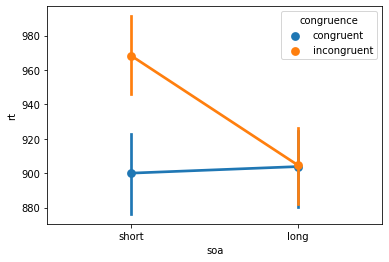

In [44]:
sns.pointplot(data = df, x = 'soa', y = 'rt', hue = 'congruence')

Let's take a look at the individual trials.

<AxesSubplot:xlabel='soa', ylabel='rt'>

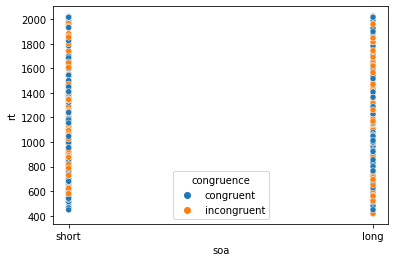

In [45]:
sns.scatterplot(data = df, x = 'soa', y = 'rt', hue = 'congruence')

Too many datapoints on top of each other. Can't see anything! Make a different plot:

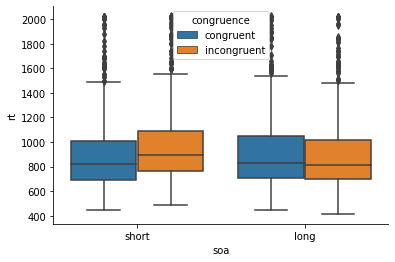

In [46]:
sns.boxplot(data = df, x = 'soa', y = 'rt', hue = 'congruence')
sns.despine()

Hmm. There are some outliers. Let's try without them..

<AxesSubplot:xlabel='soa', ylabel='rt'>

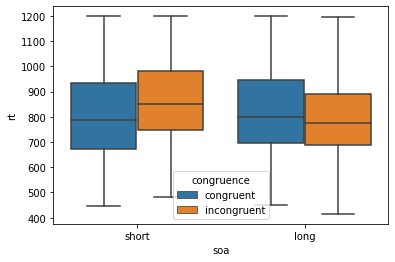

In [47]:
sns.boxplot(data = df.loc[df['rt'] < 1200], x = 'soa', y = 'rt', hue = 'congruence')

<AxesSubplot:xlabel='soa', ylabel='rt'>

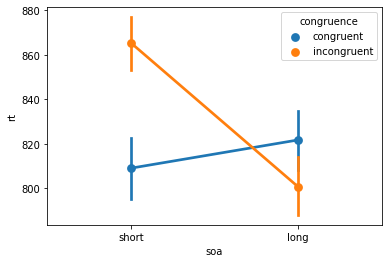

In [48]:
sns.pointplot(data = df.loc[df['rt'] < 1200], x = 'soa', y = 'rt', hue = 'congruence')

How many rows of data did we throw away, when we got rid of the "outliers"?

In [49]:
df.shape[0] - df.loc[df['rt'] < 1200].shape[0]

392

Did all the outliers come from the same person, or lots of different people?

In [50]:
outliers = df[df['rt'] > 1200]
outliers['id'].unique()

array([799, 796, 795, 794, 789, 788, 784, 777, 772, 770, 769, 802, 800,
       798, 797, 792, 791, 786, 783, 779, 776, 773])

It looks like it was lots of different people. Did _all_ the participants have some scores above 1200 ms? Let's compare the array of ID's of the participants in the full data set with the ID's of the participants who had some RT's longer than 1200 ms, to see if they are exactly the same:

In [51]:
np.array_equal(outliers['id'].unique(), df['id'].unique())

False

Ok, so there were some participants who never took over 1200 ms. Who were they, and how many of them were there?

In [52]:
speed_demons = [x for x in df['id'].unique() if x not in outliers['id'].unique()]
speed_demons

[785]

Ok, so there was actually only one participant who didn't have at least one "outlier" datapoint. Is there anything else unusual about this person's data? Let's plot participant 785's data together with everybody else's data (with outliers removed).

<AxesSubplot:xlabel='soa', ylabel='rt'>

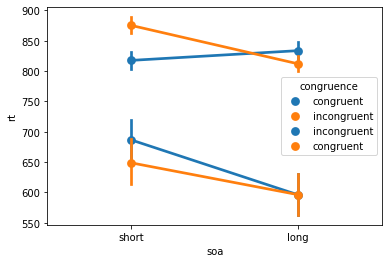

In [53]:

sns.pointplot(data = df.loc[((df['rt'] < 1200) & (df['id'] != 785))], 
              x = 'soa', y = 'rt', 
              hue = 'congruence')
sns.pointplot(data = df.loc[df['id'] == 785], x = 'soa', y = 'rt', hue = 'congruence')

No, not really. The overall pattern is the same, they are just substantially faster than everybody else. What about their accuracy? Were they fast, but sloppy?

In [54]:
def accuracy(data):
    correct = len(data[data['correct']== 1])
    errors = len(data[data['correct']== 0])
    percent_correct = round((correct / (correct + errors)) * 100, 2)
    return(percent_correct)

In [55]:
accuracy(df.loc[df['id'] == 785])

74.17

In [56]:
accuracy(df.loc[df['id'] != 785])

68.22

No, not only was this person faster than everybody else, they also made fewer mistakes. Now, what happens if we look at the data after removing the trials on which people made mistakes...?

<AxesSubplot:xlabel='soa', ylabel='rt'>

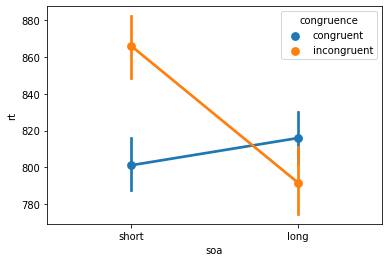

In [57]:
sns.pointplot(data = df.loc[((df['rt'] < 1200) & (df['correct'] == 1))], 
              x = 'soa', y = 'rt', 
              hue = 'congruence')

Could there be any semantic priming effect in the incongruent data? That is, do "natural" primes prime "natural" targets, even when they are incongruent?

<AxesSubplot:xlabel='rt', ylabel='condition'>

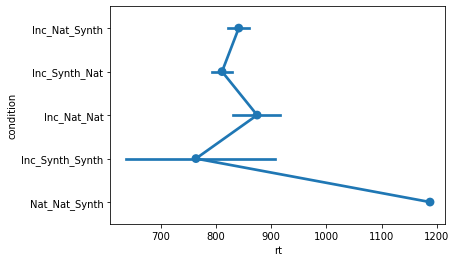

In [58]:
sns.pointplot(data = df.loc[((df['rt'] < 1200) & 
                             (df['correct'] == 1) & 
                             (df['congruence'] == 'incongruent'))], 
              y = 'condition', 
              x = 'rt')

Huh. That looks weird. What's going on with that Nat_Nat_Synth?

In [59]:
natnatsynth = df[df['condition'] == 'Nat_Nat_Synth']
natnatsynth

,id,counter_balance,condition,rt,congruence,soa,correct
53,799,A,Nat_Nat_Synth,1030,incongruent,short,0
176,796,A,Nat_Nat_Synth,1080,incongruent,short,0
301,795,A,Nat_Nat_Synth,1226,incongruent,short,0
408,794,A,Nat_Nat_Synth,1964,incongruent,short,1
520,789,A,Nat_Nat_Synth,782,incongruent,short,0
639,788,A,Nat_Nat_Synth,901,incongruent,short,0
764,785,A,Nat_Nat_Synth,590,incongruent,short,0
876,784,A,Nat_Nat_Synth,862,incongruent,short,0
1010,777,A,Nat_Nat_Synth,786,incongruent,short,0
1140,772,A,Nat_Nat_Synth,756,incongruent,short,0


In [60]:
natnatsynth = raw_a[raw_a['condition'] == 'Nat_Nat_Synth']
nns = pd.DataFrame(natnatsynth, columns = ['prime', 'target'])
nns

,prime,target
53,finch,SLOTH
176,finch,SLOTH
301,finch,SLOTH
408,finch,SLOTH
520,finch,SLOTH
639,finch,SLOTH
764,finch,SLOTH
876,finch,SLOTH
1010,finch,SLOTH
1140,finch,SLOTH


In [61]:
natnatsynth = raw_b[raw_b['condition'] == 'Nat_Nat_Synth']
nns = pd.DataFrame(natnatsynth, columns = ['prime', 'target'])
nns

,prime,target
70,finch,SLOTH
201,finch,SLOTH
313,finch,SLOTH
478,finch,SLOTH
577,finch,SLOTH
743,finch,SLOTH
859,finch,SLOTH
936,finch,SLOTH
1075,finch,SLOTH
1202,finch,SLOTH


Ah. It seems like there is one item I mislabled, the one where "finch" primes "SLOTH". That should be easy to fix...

From here on, it's up to you. Clean up my mess with finch/SLOTH, and do some appropriate analyses to get answers to the research questions...

## Main analysis: 2-2 ANOVA

In [64]:
aov = pg.rm_anova(data = df, 
               dv = 'rt', 
               within = ['congruence', 'soa'],
               subject = 'id')
aov

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruence,27378.050048,1,22,27378.050048,15.337799,0.000739,0.000739,0.014364,1.0
1,soa,20738.017440,1,22,20738.017440,5.084641,0.034427,0.034427,0.010918,1.0
2,congruence * soa,26361.816425,1,22,26361.816425,12.020311,0.002191,0.002191,0.013838,1.0


<AxesSubplot:xlabel='soa', ylabel='rt'>

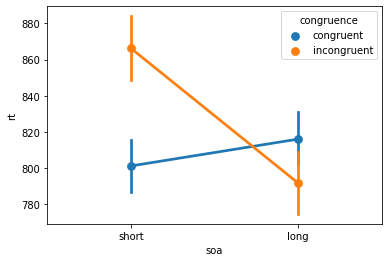

In [65]:
sns.pointplot(data = df.loc[((df['rt'] < 1200) & (df['correct'] == 1))], 
              x = 'soa', y = 'rt', 
              hue = 'congruence')

In [85]:
pg.pairwise_ttests(data = df, dv = 'rt', within = ['soa', 'congruence'], subject = 'id', padjust='bonf')

RecursionError: maximum recursion depth exceeded while calling a Python object

In [84]:
df

,id,counter_balance,condition,rt,congruence,soa,correct
4,799,A,Con_Synth,824,congruent,short,1
5,799,A,Con_Nat,796,congruent,short,1
6,799,A,Inc_Synth_Synth,881,incongruent,short,0
7,799,A,Con_Synth,1243,congruent,short,1
8,799,A,Con_Nat,1956,congruent,short,1
...,...,...,...,...,...,...,...
1359,773,B,Con_Nat,737,congruent,short,1
1360,773,B,Inc_Nat_Synth,788,incongruent,short,0
1361,773,B,Con_Synth,1047,congruent,short,1
1362,773,B,Con_Synth,955,congruent,short,1
